In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Sklearn pipelines

You have so constructed models that can
* `train` and
* `predict`

... but you also saw how the `StandardScaler` can `train` and `transform`

## The ML pipeline

We always do something like this:

![](pipeline.svg)

In [54]:
import graphviz

g = """
digraph "pipeline" {
    rankdir = LR;
    node [shape=rectangle];
    Preprocessing -> "Feature engineering" -> Modelling -> Validation -> Prediction
}
"""

graphviz.Source(g, format="svg").render('pipeline')

'pipeline.svg'

## Training and executing

* [LinearRegression](https://github.com/scikit-learn/scikit-learn/blob/7b136e9/sklearn/linear_model/base.py#L362)
* [StandardScaler](https://github.com/scikit-learn/scikit-learn/blob/7b136e9/sklearn/preprocessing/data.py#L496)

The `BaseEstimator` is the basis for estimating things; this applies to both preprocessing, feature engineering and modelling.

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [3]:
data_x, data_y = np.ones((100, 1)), np.ones((100, 1))
step1 = StandardScaler().fit_transform(data_x)
step2 = LinearRegression().fit(data_x, data_y).score(data_x, data_y)
print(step2)

1.0


## Machine learning pipelines

Later we will have many more steps, so this will be painful!

Introducing `sklearn` pipelines:

In [4]:
from sklearn.pipeline import make_pipeline

data_x, data_y = np.ones((100, 1)), np.ones((100, 1))
model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(data_x, data_y).score(data_x, data_y)

1.0

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

n_samples = 30

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

In [6]:
def degree_scores(degree):
    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = make_pipeline(polynomial_features,
                             linear_regression)
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using cross validation
    return pipeline, cross_val_score(pipeline, X[:, np.newaxis], y,
                           scoring="neg_mean_squared_error", cv=10)

In [7]:
def plot_score(index, degree):
    pipeline, scores = degree_scores(degree)
    
    ax = plt.subplot(1, len(degrees), index + 1)
    plt.setp(ax, xticks=(), yticks=())
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[index], -scores.mean(), scores.std()))

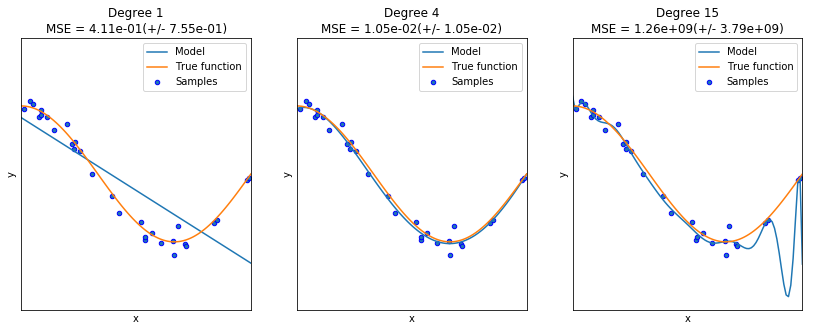

In [8]:
degrees = [1, 4, 15]

plt.figure(figsize=(14, 5))

for index, degree in enumerate(degrees):
    plot_score(index, degree)